<a href="https://colab.research.google.com/github/x1001000/tfgai/blob/master/Ann's_practice_on_LeNet_%26_AlexNet_(CIFAR_10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

# loading MNIST data from tensorflow datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# modify data structure for the model
#x_train = x_train[:, :, :, np.newaxis]
#x_test = x_test[:, :, :, np.newaxis]

# some preprocessing to the labels
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# casting data type & normalizing images
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train.shape

2.3.0
170500096/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
# model definition
lenet = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size = (5, 5), strides = (1, 1),
                          activation = 'tanh', input_shape = x_train[0].shape, padding = "same"),
    tf.keras.layers.AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'),
    tf.keras.layers.Conv2D(16, kernel_size = (5, 5), strides = (1, 1), activation = 'tanh', padding = 'valid'),
    tf.keras.layers.AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation = 'tanh'),
    tf.keras.layers.Dense(84, activation = 'tanh'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# setting the optimizer, loss function, and the metrics to measure
lenet.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# print model summary
lenet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               69240     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [ ]:
alexnet = tf.keras.Sequential([
    tf.keras.layers.Conv2D(96, kernel_size = (11, 11), strides = 4, padding = 'valid', activation = 'relu', input_shape = x_train[0].shape),
    tf.keras.layers.MaxPooling2D((3, 3), strides = (2, 2), padding = 'valid'),
    tf.keras.layers.Conv2D(256, kernel_size = (5, 5), strides = 1, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'same'),
    tf.keras.layers.Conv2D(384, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu'),
    tf.keras.layers.Conv2D(384, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu'),
    tf.keras.layers.Conv2D(256, kernel_size = (5, 5), strides = 1, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation = 'relu'),
    tf.keras.layers.Dense(4096, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
alexnet.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

alexnet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 6, 6, 96)          34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 96)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 256)         614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 384)         885120    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 384)         1327488   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 256)        

In [ ]:
# model training
history_le = lenet.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))
history_al = alexnet.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7577 - accuracy: 0.3826 - val_loss: 1.5759 - val_accuracy: 0.4424
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4986 - accuracy: 0.4729 - val_loss: 1.4581 - val_accuracy: 0.4832
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3733 - accuracy: 0.5150 - val_loss: 1.3898 - val_accuracy: 0.5063
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3013 - accuracy: 0.5408 - val_loss: 1.3442 - val_accuracy: 0.5222
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2477 - accuracy: 0.5599 - val_loss: 1.3330 - val_accuracy: 0.5260
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1973 - accuracy: 0.5794 - val_loss: 1.3270 - val_accuracy: 0.5342
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1532 - accuracy: 0.5918 - val_loss: 1.3431 - val_accuracy:

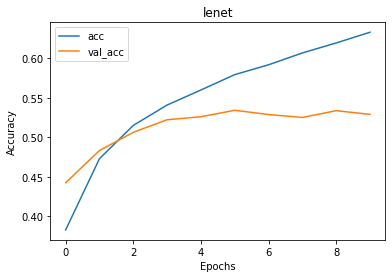

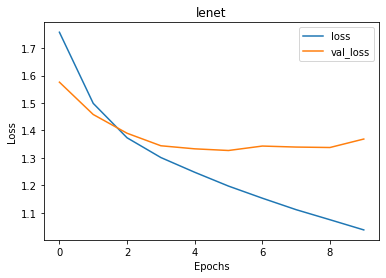

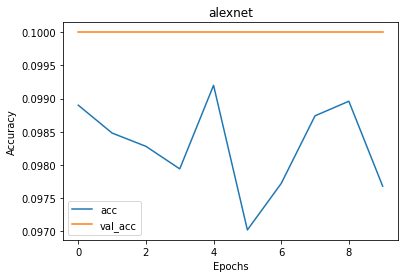

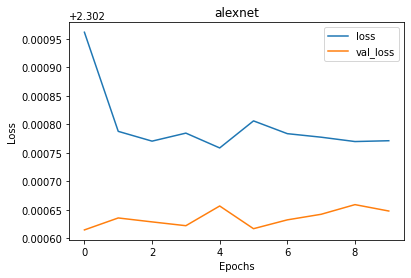

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, model_name):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(['acc', 'val_acc'])
    plt.title(model_name)
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(['loss', 'val_loss'])
    plt.title(model_name)
    plt.show()
plot_graphs(history_le, "lenet")
plot_graphs(history_al, "alexnet")